In [ ]:
%run ParsingMethods.ipynb

timestamps = {}
all_contributions = {}
all_folders = []

all_contributions, timestamps, all_folders = parseCSV('contributions.csv')

In [6]:
# Create a map of shortened questions to nodes so we can cluster and then refer back
# For now, limit this to just one hw assignment

folder = "hw4"

to_cluster = {}
for node in all_contributions.values():
    if folder in node.question_folders:
        to_cluster[node.shortened_question] = node

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

from xml.dom import minidom
keys = list(to_cluster.keys())

print(len(keys))

# parse an xml file by name
mydoc = minidom.parse('Posts.xml')

SEitems = mydoc.getElementsByTagName('row')

SEitems_questions = []
for item in SEitems:
    SEitems_questions.append(item.attributes['Body'].value)
    
SEitems_questions = SEitems_questions[1:6000]

vectorizer = TfidfVectorizer()
X_orig = vectorizer.fit(SEitems_questions)
X = vectorizer.transform(keys)

# # Number of clusters per homework
Sum_of_squared_distances = []
K = range(1,100)
for true_k in K:
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=10)
    model.fit(X)
    Sum_of_squared_distances.append(model.inertia_)
    

369


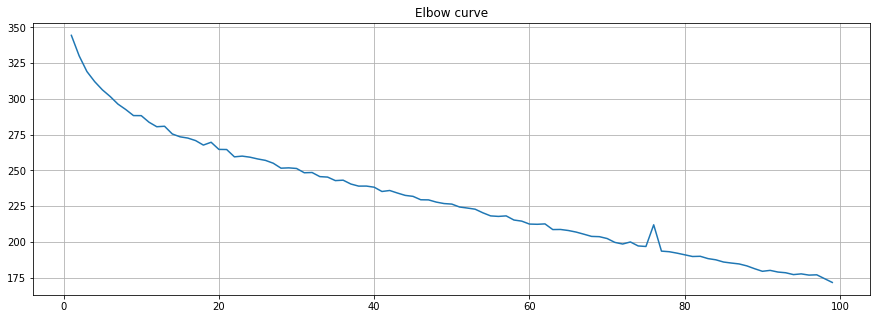

In [9]:
# Plotting elbow curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1,100), Sum_of_squared_distances)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [10]:
import numpy as np
# Doing the Gap statistic
def optimalK(data, nrefs=3, maxClusters=70):
    gaps = [0] * len(range(1, maxClusters))
    
    resultsdf = {}
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = [0] * nrefs

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=10)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=10)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf[k] = gap 

    return (gaps.index(max(gaps)) + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

k, gapdf = optimalK(X, nrefs=5, maxClusters=15)


In [11]:
print(k)


14


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

from xml.dom import minidom
keys = list(to_cluster.keys())

print(len(keys))

# parse an xml file by name
mydoc = minidom.parse('Posts.xml')

SEitems = mydoc.getElementsByTagName('row')

SEitems_questions = []
for item in SEitems:
    SEitems_questions.append(item.attributes['Body'].value)
    
SEitems_questions = SEitems_questions[1:6000]

vectorizer = TfidfVectorizer(stop_words='english')
X_orig = vectorizer.fit(SEitems_questions)
X = vectorizer.transform(keys)

# Number of clusters per homework
true_k = 14
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=10)
model.fit(X)

369


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=14, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [66]:
final_clusters = {}
cluster_location = {}
for i in range(len(keys)):
    label = model.labels_[i]
    final_clusters.setdefault(label, []).append(to_cluster[keys[i]])
    cluster_location[to_cluster[keys[i]]] = label


In [67]:
for short_question in final_clusters[2]:
    print(short_question)
    node = to_cluster.get(short_question)
    print(node.raw_question)
    

hw4  job finish writing tests  truncate   delete   mean nt write tests functions queue interface  writing tests create  valid   see tests queuetestml 


AttributeError: 'NoneType' object has no attribute 'raw_question'